# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

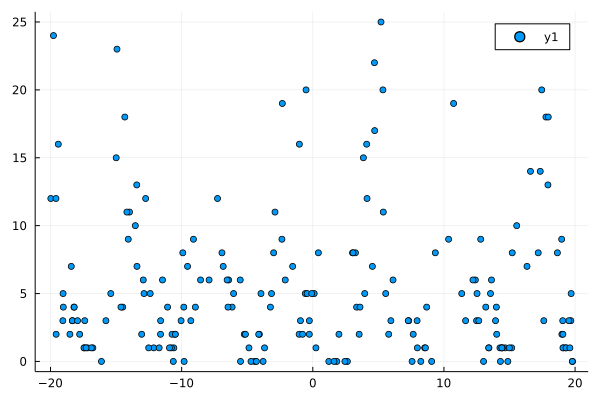

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -503.6771675944114
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.166716 seconds (6.84 M allocations: 420.290 MiB, 2.46% gc time, 98.04% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.5500834699480339, 0.5987428225525707, 0.18129126019615777, 0.21141787202101403, 0.8028710380029674, 0.2953898437157921, 0.23142197829775388, 0.18937067738840552, 0.47723404325909563, 0.17157210226032868  …  0.20215073654992208, 0.1788042389547861, 0.346289036554803, 0.21852411420672987, 0.21453303618187727, 0.5697806523402879, 0.2694301989019675, 0.1898375710235143, 0.5326400960888462, 0.6163358949982571], θ = [3.9020974463403584, 3.884636293857658, 4.4877154281509055, 3.4870212331016597, 2.8486012786694888, 5.956749761598442, 6.968925336252155, 5.483622322066202, 3.9257726441181258, 8.479209998743418  …  6.477954917517383, 3.989376976240791, 2.47531346886682, 3.9841580492706683, 6.475184310402464, 5.842777274137401, 4.472973935345693, 6.480549346190243, 2.9310296984088384, 2.4237554278998865]), opt_state = (NamedTuple(),), hyperopt_state = (Name

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -690.177717998297
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.167556 seconds (4.34 M allocations: 303.178 MiB, 3.02% gc time, 95.99% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 11.874322193667952) infered by Analytic Variational Inference , (local_vars = (c = [0.7016410077080095, 0.7446916101590795, 0.15460687090145336, 0.30884660971204286, 0.9383043062567975, 0.2704928758935374, 0.33693085009983664, 0.1697101802368193, 0.6056510879425439, 0.1809288685737554  …  0.26382208950739683, 0.2453590842253355, 0.4350035009483482, 0.18322336801703665, 0.17925251300981979, 0.6408631806307734, 0.3968846777633819, 0.24195744944038225, 0.6899402448618325, 0.733886663947449], θ = [5.214900597056845, 5.236168041138033, 4.952201244022113, 4.31474156308682, 4.389134099744227, 6.097370970072165, 7.828671850713037, 5.972194235283751, 5.101456043682254, 9.053410216953226  …  7.20983710050269, 4.711338721030833, 3.4336365132720204, 4.3143705304851485, 6.904566918374574, 5.38268653668103, 5.424007686434312, 7.177838708900621, 4.251032073498263, 3.741120760289759], γ = [7.854213751160932, 7.951887593009258, 5.924123611955

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

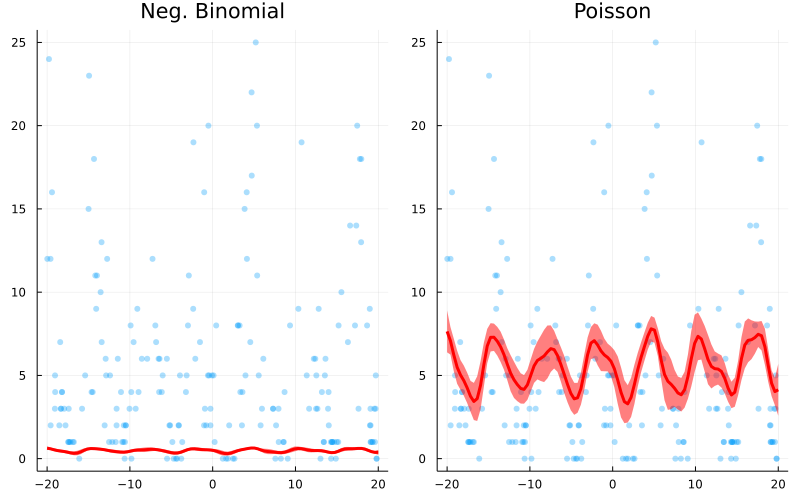

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*